In [1]:
import torch 
import numpy as np
import cupy as cp
import time 
import torchint
import numpyint
import cupyint
import torchquad
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# torchquad test
torchquad.set_up_backend("torch", data_type="float32")
def parametrized_integrand(x, a, b):
    return torch.sqrt(torch.cos(torch.sin((a + b) * x)))

a_params = torch.arange(1000)
b_params = torch.arange(1000)
integration_domain = torch.Tensor([[0, 1]])
simp = torchquad.Simpson()
grid = torch.stack([torch.Tensor([a + b for a in a_params]) for b in b_params])

def integrand(x):
    return torch.sqrt(torch.cos(torch.sin(torch.einsum("i,jk->ijk", x.flatten(), grid))))
start_time = time.time()
result_vectorized = simp.integrate(integrand, dim=1, N=101, integration_domain=integration_domain)
end_time = time.time()
elapsed_time = end_time - start_time

# print("torchquad time used: "+ str(elapsed_time)+ "s")
print(result_vectorized.flatten())
print(result_vectorized.dtype)
print(result_vectorized.device)

time_torchquad=np.zeros(1000)
for i in range(len(time_torchquad)):
    start_time = time.time()
    result_vectorized = simp.integrate(integrand, dim=1, N=101, integration_domain=integration_domain)
    end_time = time.time()
    elapsed_time = end_time - start_time
    time_torchquad[i] = elapsed_time

/home1/09806/ouyangze111/.local/lib/python3.9/site-packages/torch/__init__.py:955: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:432.)
  _C._set_default_tensor_type(t)
/home1/09806/ouyangze111/.local/lib/python3.9/site-packages/torch/functional.py:513: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3609.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


tensor([1.0000, 0.9303, 0.8444,  ..., 0.8704, 0.8691, 0.8697])
torch.float32
cuda:0


In [3]:
#torchint test
data_type = torch.float32
device_type = 'cuda'
torchint.set_backend(data_type, device_type)

def function(x,params):
    a = params[0]
    b = params[0]
    return torch.sqrt(torch.cos(torch.sin((a+b) * x)))


a1_values = torch.arange(1000)
a2_values = torch.arange(1000)
param_values = torch.stack((a1_values, a2_values), dim=1)


start_time = time.time()
integral_value = torchint.trapz_integrate(function, param_values, [[0,1]], [101], None) 
end_time = time.time()
elapsed_time = end_time - start_time
# print("torchquad time used: "+ str(elapsed_time)+ "s")
# print(integral_value)
# print(integral_value.dtype)
# print(integral_value.device)

time_torchint=np.zeros(1000)
for i in range(len(time_torchint)):
    start_time = time.time()
    integral_value = torchint.trapz_integrate(function, param_values, [[0,1]], [101], None)
    end_time = time.time()
    elapsed_time = end_time - start_time
    time_torchint[i] = elapsed_time

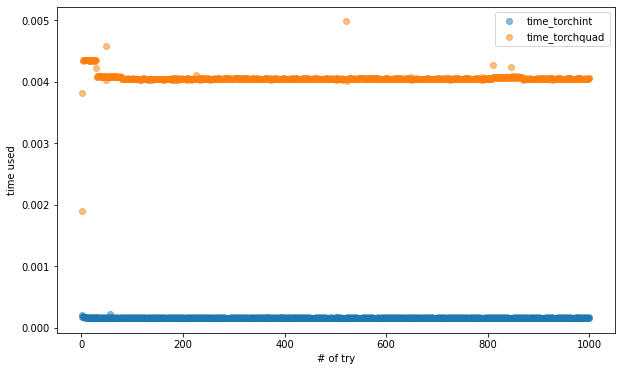

0.00016013503074645995
0.004059060335159302


In [12]:
x_axis = np.linspace(1,1000,1000)
plt.figure(figsize=(10, 6))
plt.scatter(x_axis, time_torchint, label="time_torchint", alpha=0.5)
plt.scatter(x_axis, time_torchquad, label="time_torchquad", alpha=0.5)
# plt.axhline(y = np.sum(time_torchint)/1000, color='b', linestyle='--', label='average torchint')
# plt.axhline(y = np.sum(time_torchquad)/1000, color='o', linestyle='--', label='average torchquad')
plt.xlabel("# of try")
plt.ylabel("time used")
plt.legend()
plt.show()
print(np.sum(time_torchint)/1000)
print(np.sum(time_torchquad)/1000)

In [ ]:
#cupyint test
data_type = cp.float32
cupyint.set_backend(data_type)

def function(x,params):
    a = params[0]
    b = params[0]
    return cp.sqrt(cp.cos(cp.sin((a+b) * x)))


a1_values = cp.arange(400)
a2_values = cp.arange(400)
param_values = torch.stack((a1_values, a2_values), dim=1)


start_time = time.time()
integral_value = cupyint.trapz_integrate(function, param_values, [[0,1]], [101], None) 
end_time = time.time()
elapsed_time = end_time - start_time
# print("torchquad time used: "+ str(elapsed_time)+ "s")
# print(integral_value)
# print(integral_value.dtype)
# print(integral_value.device)

time_cupyint=np.zeros(1000)
for i in range(len(time_cupyint)):
    start_time = time.time()
    integral_value = cupyint.trapz_integrate(function, param_values, [[0,1]], [101], None)
    end_time = time.time()
    elapsed_time = end_time - start_time
    time_cupyint[i] = elapsed_time